In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import pyflux as pf
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sm
import statsmodels.tsa.api as smt

In [32]:
msft = pd.DataFrame.from_csv('MSFT.csv')
wmart = pd.DataFrame.from_csv('WMT.csv')
fb = pd.DataFrame.from_csv('FB.csv')
msft.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-09-15,56.15,57.350,55.98,57.19,26435104.0,0.0,1.0,56.15,57.350,55.98,57.19,26435104.0
2016-09-14,56.39,56.630,56.03,56.26,23616182.0,0.0,1.0,56.39,56.630,56.03,56.26,23616182.0
2016-09-13,56.50,56.650,56.05,56.53,29465088.0,0.0,1.0,56.50,56.650,56.05,56.53,29465088.0
2016-09-12,56.00,57.205,55.61,57.05,28441578.0,0.0,1.0,56.00,57.205,55.61,57.05,28441578.0
2016-09-09,56.79,57.520,56.21,56.21,33475922.0,0.0,1.0,56.79,57.520,56.21,56.21,33475922.0


In [33]:

op = msft.Open
high = msft.High
low = msft.Low
close = msft.Close
op

Date
2016-09-15    56.150
2016-09-14    56.390
2016-09-13    56.500
2016-09-12    56.000
2016-09-09    56.790
2016-09-08    57.630
2016-09-07    57.470
2016-09-06    57.780
2016-09-02    57.670
2016-09-01    57.010
2016-08-31    57.650
2016-08-30    57.980
2016-08-29    58.180
2016-08-26    58.280
2016-08-25    57.880
2016-08-24    57.800
2016-08-23    57.900
2016-08-22    57.600
2016-08-19    57.430
2016-08-18    57.420
2016-08-17    57.540
2016-08-16    57.610
2016-08-15    58.010
2016-08-12    58.030
2016-08-11    58.030
2016-08-10    58.160
2016-08-09    58.170
2016-08-08    58.055
2016-08-05    57.650
2016-08-04    56.800
               ...  
1986-04-24    28.870
1986-04-23    28.750
1986-04-22    29.250
1986-04-21    29.250
1986-04-18    30.250
1986-04-17    30.000
1986-04-16    29.000
1986-04-15    29.000
1986-04-14    28.750
1986-04-11    28.500
1986-04-10    28.000
1986-04-09    27.500
1986-04-08    27.250
1986-04-07    27.750
1986-04-04    27.750
1986-04-03    27.750
1986-04-

TypeError: Empty 'DataFrame': no numeric data to plot

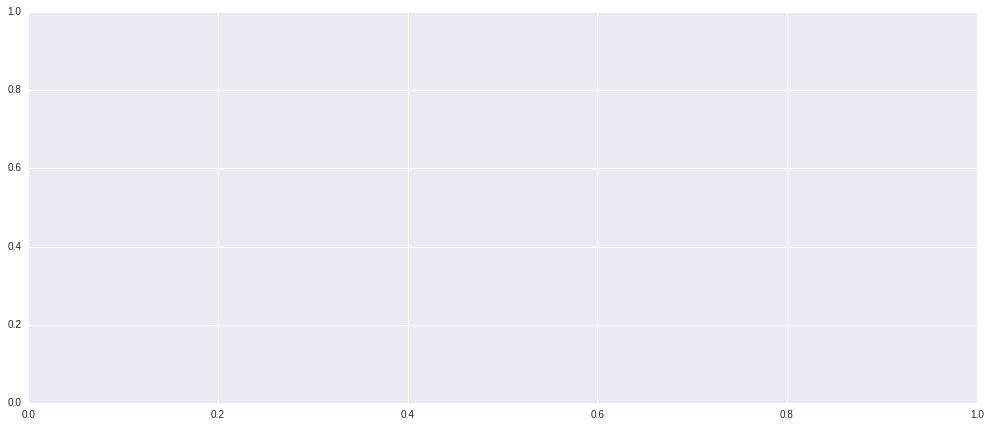

In [30]:
plt.figure(figsize=(17,7))
op.plot()

In [37]:
def test_stationarity(timeseries):
    #Determining Rolling Statistics
    
    rolmean=pd.Series.rolling(timeseries, window=12).mean()
    rolstd=pd.Series.rolling(timeseries, window=12).std()
    
    #Plot Rolling Statistics
    plt.figure(figsize=(17,7))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')    
    plt.legend(loc='best')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dicket Fuller Test:'
    dftest=sm.adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print dfoutput

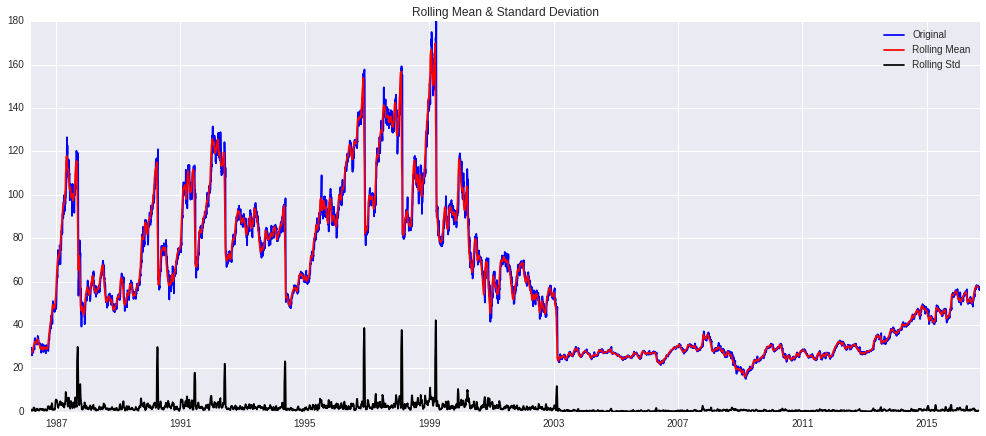

Results of Dicket Fuller Test:
Test Statistic                   -3.178525
p-value                           0.021262
#Lags Used                        4.000000
Number of Observations Used    7677.000000
Critical Value (5%)              -2.861917
Critical Value (1%)              -3.431202
Critical Value (10%)             -2.566970
dtype: float64


In [7]:
test_stationarity(close)

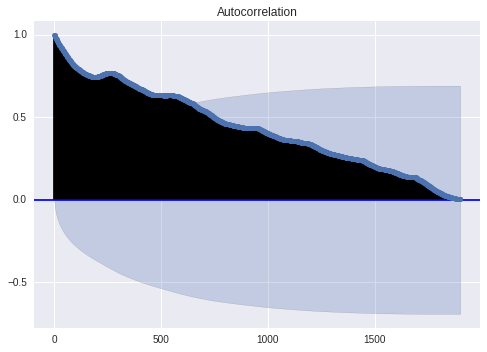

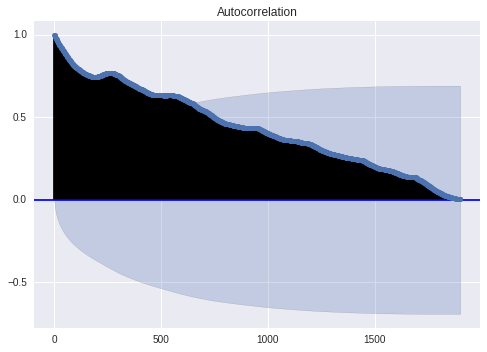

In [20]:
smt.graphics.plot_acf(op, lags=1900)

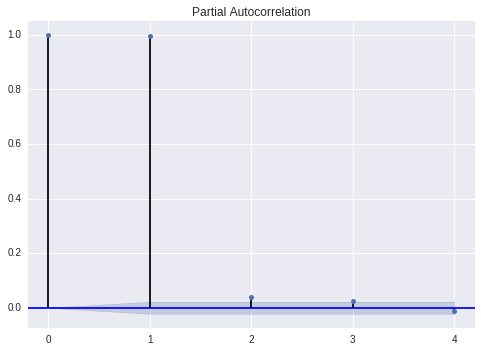

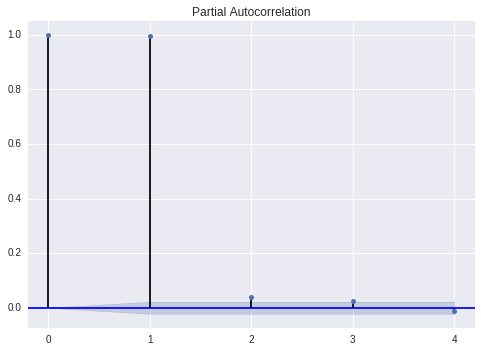

In [18]:
smt.graphics.plot_pacf(op,lags=4)

In [ ]:
sm.arma_order_select_ic(op,max_ar=4, max_ma=1900)

In [5]:
arimapf=pf.ARIMA(msft,  ar=4, ma=1900,target='High')

In [ ]:
fit=arimapf.fit("MLE")

In [ ]:
fit.summary()

In [ ]:
type(fit)

In [39]:
yr2000=pd.date_range('2000-01-01','2001-01-01', freq='D')
msft.loc[yr2000]
op2=msft.loc[yr2000].Open
op2

2000-01-01       NaN
2000-01-02       NaN
2000-01-03    117.38
2000-01-04    113.56
2000-01-05    111.12
2000-01-06    112.19
2000-01-07    108.62
2000-01-08       NaN
2000-01-09       NaN
2000-01-10    113.44
2000-01-11    111.50
2000-01-12    108.50
2000-01-13    104.38
2000-01-14    107.19
2000-01-15       NaN
2000-01-16       NaN
2000-01-17       NaN
2000-01-18    111.81
2000-01-19    110.50
2000-01-20    107.06
2000-01-21    107.00
2000-01-22       NaN
2000-01-23       NaN
2000-01-24    103.80
2000-01-25    101.00
2000-01-26    102.44
2000-01-27     99.89
2000-01-28     98.12
2000-01-29       NaN
2000-01-30       NaN
               ...  
2000-12-03       NaN
2000-12-04     57.25
2000-12-05     59.19
2000-12-06     60.00
2000-12-07     53.44
2000-12-08     54.62
2000-12-09       NaN
2000-12-10       NaN
2000-12-11     55.50
2000-12-12     57.81
2000-12-13     60.50
2000-12-14     57.94
2000-12-15     51.05
2000-12-16       NaN
2000-12-17       NaN
2000-12-18     49.00
2000-12-19   

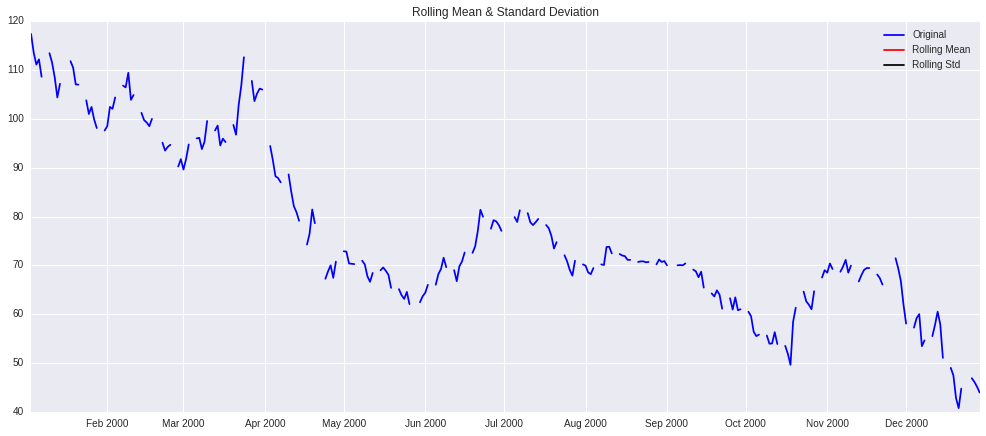

Results of Dicket Fuller Test:


LinAlgError: SVD did not converge

In [38]:
test_stationarity(op2)